In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_queens = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv")
df_manhattan = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")
print(df_queens.columns)

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')


# Training Set vs Test Set

The training data is what we will let the ML algorithm learn from. It will be able to draw understandings and make conclusions based on this data.

The test data is left untouched at the beginning and then after the ML algorithm has learnt (via the training data) then we will see if the understandings the ML algo has picked up can be used to accurately predict the test data.

### In general we put 80% of our data into the training set and 20% into the testing set
- 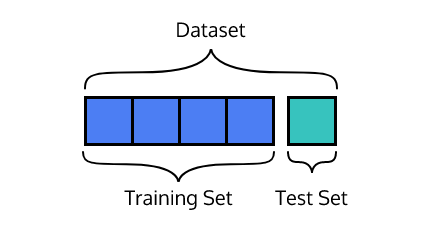


### Sklearn and  train_test_split
Python has a built in module that lets us portion out our data
train_test_split has a few parameters that we must be aware of

#### train_size
- The proportion of the dataset to include in the train split
- Between 0.0 to 1.0

#### test_size
- The proportion of the dataset to include in the test split.
- Between 0.0 to 1.0

#### random_state
- The seed used by the random number generator
- This param is option and not often used

In [13]:

df= pd.DataFrame(df_manhattan)

x=df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y=df.rent

x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.8,
test_size=0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831,)
(708,)


So above we have a lot of x parameters and then one y value (rent). We want to see how the x values combine to affect the y value (rent).
It's like saying how does the amount of bedrooms affect the rent of a property. But obviously other factors (other than bedrooms) will affect rent.
And that is that is why we have multiple x values

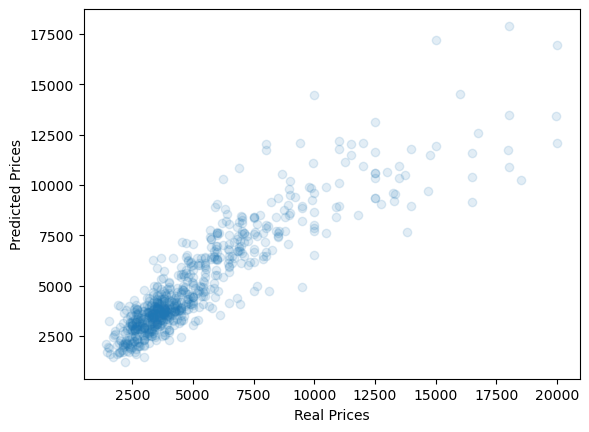

In [14]:
mlr = LinearRegression()

mlr.fit(x_train, y_train)

y_predict=mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.13)
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.show()


## Correlations

When working with multiple linear regressions we will have many x values and each of those will have a level of influence 

In [20]:
coef_list=list(zip(mlr.coef_, df.columns))
coef_obj={"+":{}, "-":{}}

for x in coef_list:
    influence =x[0];name=x[1]
    if influence > 0:
        coef_obj["+"][name] = influence
    else:
        coef_obj["-"][name] = influence
print(coef_obj)

{'+': {'rent': 1199.3859950967849, 'bedrooms': 4.799767421983977, 'size_sqft': 24.19824177208077, 'building_age_yrs': 48.85017415482249, 'no_fee': 191.42573239879724, 'has_washer_dryer': 89.40888899966257}, '-': {'rental_id': -302.73009382882435, 'bathrooms': -24.289931506203654, 'min_to_subway': -7.582724730114027, 'floor': -140.90664772941187, 'has_roofdeck': -151.11453387939576, 'has_doorman': -57.89714551469036, 'has_elevator': -19.319485560925216, 'has_dishwasher': -38.92369827812794}}


## Evaluating the model's accuracy

When we make use of a mlr object we are basically saying that our x values can accurarately predict our y values. This is a bold claim and if we are going to use this conclusion to make informed decisions then we want to know how likely it is that this belief is accurate.

### Residual analysis
A technique used to test the accuracy of our model is called residual analysis.
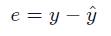

It is the difference between the true y value and the predicted y value 

#### Sklearn's method for analysis
Sklearn has its own inbuilt method for figuring our the R analysis.
It has a method called ".score" and it returns the coefficient of determination of the prediction

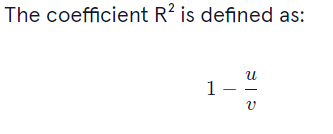

u is the residual sum of squares: ((y-y_predict)**2).sum()
We square it so we get a positive value and get the (squared) absolute difference

v is the total sum of squares: ((y-y_mean())**2).sum()
by doing this we can see how each real y value diverges from the mean

##### Explanation
So by dividing u (real y - predict y) by the diversion of real y from the mean
we will be getting a numerical value demonstrating the the variance in what we imagine y to be minus what y actual is divided by the actual variance in y.

So we are effectively seeing how well we can predict the variance in y based on our x values.

So in this was R^2 will demonstrate the percentage of variance in y that our x values can describe

So if we had a R^2 score of 80% then that means our x values can account for (and most importantly - predict) 80% of the variance in the y values

